In [81]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('nobel.csv')

Data Overview
------------------------

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [5]:
df.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [6]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [7]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    plt.subplots(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
death_city,421,42.1
death_country,415,41.5
death_date,404,40.4
organization_country,265,26.5
organization_city,265,26.5
organization_name,264,26.4
motivation,88,8.8
birth_city,36,3.6
birth_date,32,3.2
birth_country,31,3.1


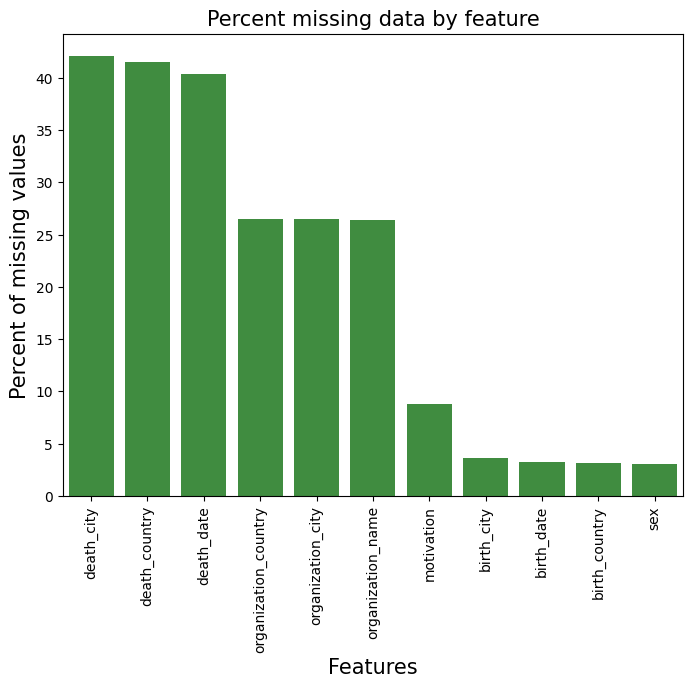

In [8]:
missingdata(df)

In [9]:
#The columns
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

---------------------

Categorical Variabes
-----------------------------------------

Cateogorical Varaiable: category

Text(0, 0.5, 'Number')

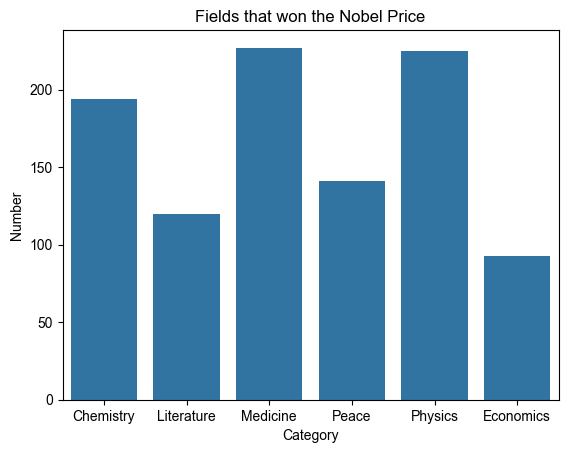

In [10]:
#The top 2 categories are Medicine and Physics
plt.title("Fields that won the Nobel Price")
plt.style.use('seaborn-v0_8')
sns.countplot(df,x="category")
plt.xlabel("Category")
plt.ylabel("Number")


Cateogorical Varaiable: Prize

In [11]:
df["prize"]

0                      The Nobel Prize in Chemistry 1901
1                     The Nobel Prize in Literature 1901
2         The Nobel Prize in Physiology or Medicine 1901
3                             The Nobel Peace Prize 1901
4                             The Nobel Peace Prize 1901
                             ...                        
995                    The Nobel Prize in Chemistry 2023
996                    The Nobel Prize in Chemistry 2023
997                   The Nobel Prize in Literature 2023
998                           The Nobel Peace Prize 2023
999    The Sveriges Riksbank Prize in Economic Scienc...
Name: prize, Length: 1000, dtype: object

In [95]:
text_without_numbers = df["prize"].str.findall(r'[^\d\s]+')
Prizes_no_numbers = text_without_numbers.str.join(' ')
Prizes_no_numbers.unique()

array(['The Nobel Prize in Chemistry', 'The Nobel Prize in Literature',
       'The Nobel Prize in Physiology or Medicine',
       'The Nobel Peace Prize', 'The Nobel Prize in Physics',
       'The Sveriges Riksbank Prize in Economic Sciences'], dtype=object)

In [99]:
Prizes_no_numbers.value_counts()

prize
The Nobel Prize in Physiology or Medicine           227
The Nobel Prize in Physics                          225
The Nobel Prize in Chemistry                        194
The Nobel Peace Prize                               141
The Nobel Prize in Literature                       120
The Sveriges Riksbank Prize in Economic Sciences     93
Name: count, dtype: int64

Which prizes were given out the most?

Medicine/Physiology followed by Chemistry, Literature and Economics (in decending order) had the most prizes


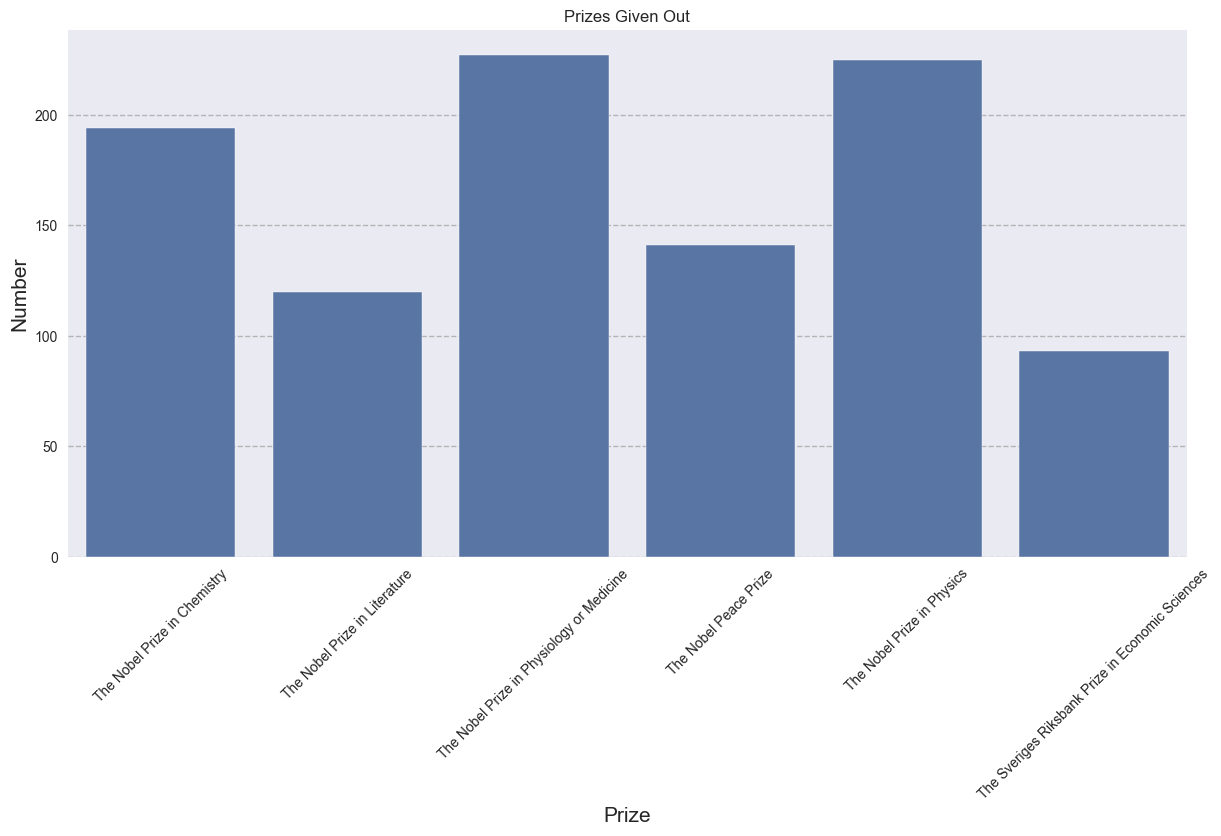

In [101]:

sns.set_style("dark")

sns.catplot(x=Prizes_no_numbers,kind="count",aspect=2,height=6)
plt.xticks(rotation=45)
plt.xlabel("Prize",fontsize=15)
plt.ylabel("Number",fontsize=15)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
plt.title("Prizes Given Out")
print("Medicine/Physiology followed by Physics Chemistry, Literature and Economics (in decending order) had the most prizes")

Cateogorical Varaiable: laureate_type

In [14]:
df["laureate_type"].value_counts()

laureate_type
Individual      966
Organization     34
Name: count, dtype: int64

Proportion of winners that belonged to organization and those that worked independently 

Text(0, 0.5, 'Number')

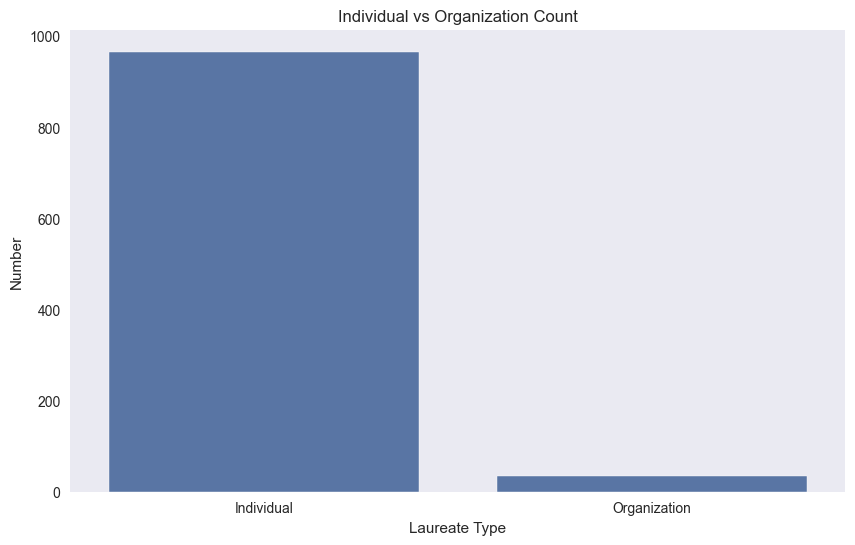

In [15]:

#More solo winners!!!
plt.figure(figsize=(10, 6))
sns.countplot(df,x="laureate_type")
plt.title("Individual vs Organization Count")
plt.xlabel("Laureate Type")
plt.ylabel("Number")

Cateogorical Varaiable: birth_country

In [16]:
# USA followed by United Kingdom,Germany,France and Sweden produces the most winners
df1=df["birth_country"].value_counts().reset_index()
df1.head(5)
top5countries=["United States of America","United Kingdom","Germany","France","Sweden"]

In [17]:
filt=df["birth_country"].isin(top5countries)
df2=df[filt].groupby("birth_country")["category"].value_counts()

In [18]:
df2.reset_index()

,birth_country,category,count
0,France,Literature,12
1,France,Medicine,12
2,France,Chemistry,11
3,France,Physics,10
4,France,Peace,9
5,France,Economics,4
6,Germany,Chemistry,22
7,Germany,Physics,19
8,Germany,Medicine,16
9,Germany,Peace,5


What is the most commonly awarded birth country?

USA won the most awards


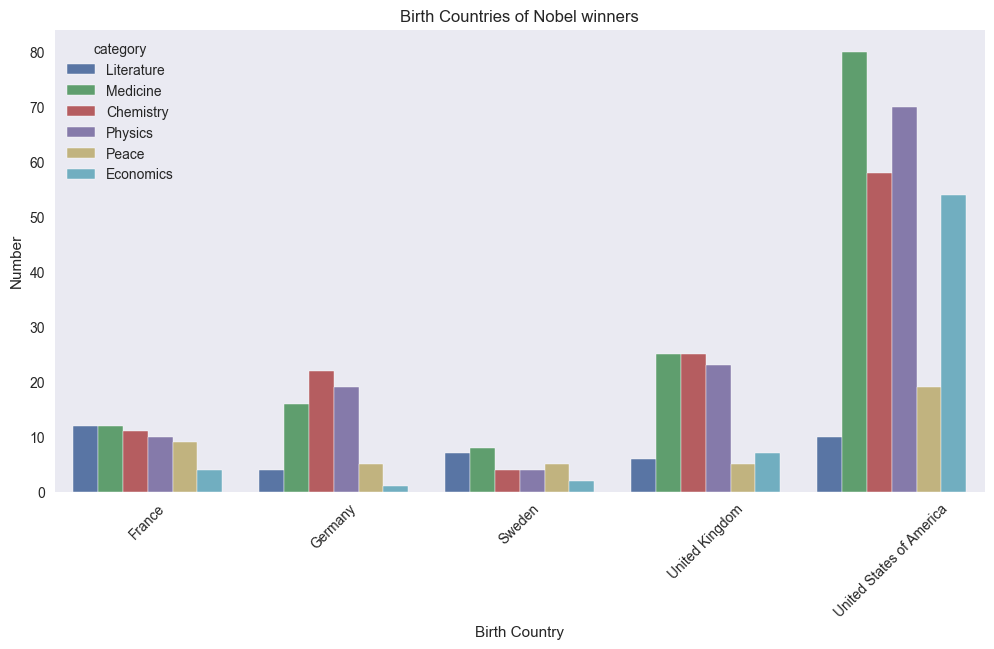

In [102]:
#USA won the most awards

plt.figure(figsize=(12,6))
plt.title("Birth Countries of Nobel winners")
sns.barplot(df2.reset_index(),x="birth_country",y="count",hue='category')
plt.xticks(rotation=45)
plt.xlabel("Birth Country")
plt.ylabel("Number")
print("USA won the most awards")

Cateogorical Varaiable: Sex




In [20]:
# More males than females
df['sex'].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

What is the most commonly awarded gender?

Text(0.5, 0, 'Sex')

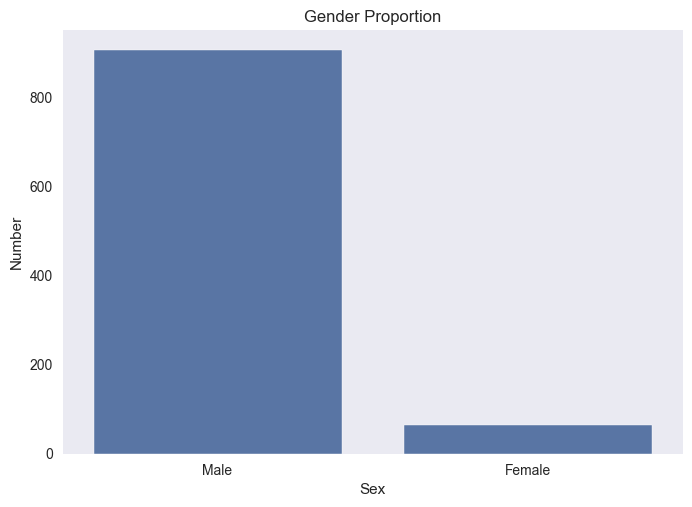

In [21]:
plt.title("Gender Proportion")
sns.countplot(df,x="sex")
plt.ylabel("Number")
plt.xlabel("Sex")

Cateogorical Varaiable: death_country

In [22]:
#Top 5 Countries The nobel winners passed. (Could be a country for retirement?)
df['death_country'].value_counts().head(5)

death_country
United States of America    206
United Kingdom               73
France                       51
Germany                      32
Sweden                       28
Name: count, dtype: int64

In [23]:
# DataFrame of top 5 countries that nobel winners passed in
retired_countries=df.groupby('death_country').agg({'laureate_id':'count'}).reset_index().sort_values('laureate_id',ascending=False).head(5)

In [24]:
retired_countries

,death_country,laureate_id
46,United States of America,206
45,United Kingdom,73
12,France,51
14,Germany,32
40,Sweden,28


Text(0, 0.5, 'Number')

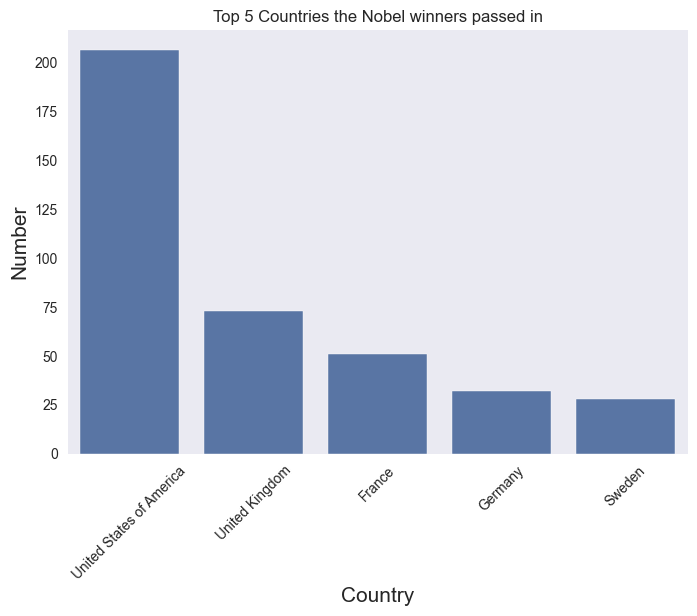

In [25]:
plt.title('Top 5 Countries the Nobel winners passed in')
sns.barplot(retired_countries,x="death_country",y="laureate_id")
plt.xticks(rotation=45)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number",fontsize=15)

--------------------

Numerical Variables
-------------

In [26]:
num_only_df=df[['year','laureate_id']]

<Axes: title={'center': 'Correlation between year and laureate id '}>

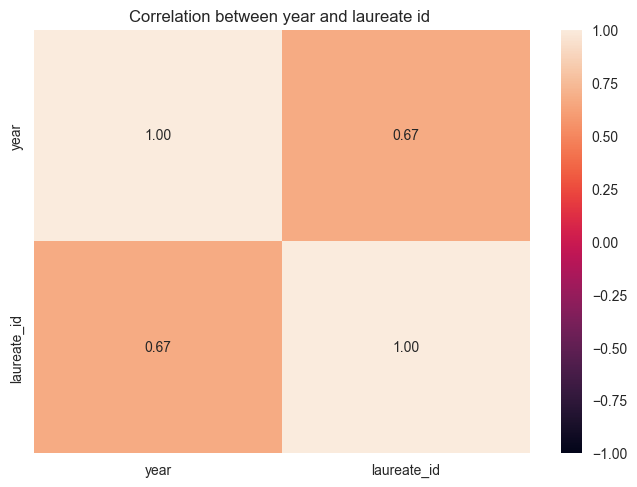

In [27]:
plt.title("Correlation between year and laureate id ")
sns.heatmap(num_only_df.corr(),annot=True,fmt='0.2f',vmin=-1)


Numerical Variable: Year

Text(0.5, 0, 'Year')

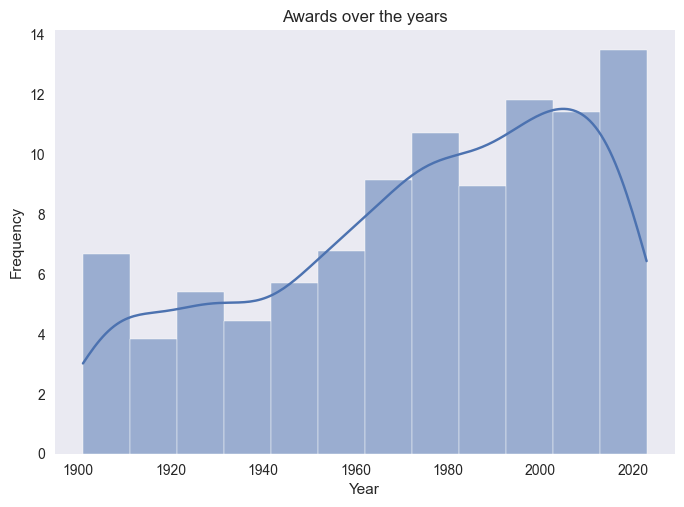

In [28]:
plt.title("Awards over the years")
sns.histplot(df,x='year',stat='frequency',kde=True)
plt.xlabel("Year")

------------

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [29]:
df["is_USA"]=df["birth_country"]=="United States of America"

In [30]:
df["decade"]=df["year"]//10 *10

In [88]:
# USA had the highest ratio
max_decade_usa=df.groupby("decade")["is_USA"].mean().sort_values(ascending=False).reset_index()

In [93]:
decade_ans=max_decade_usa.loc[0,'decade']
print(f"{decade_ans} decade has the highest ratio of US born winners")

2000 decade has the highest ratio of US born winners


Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [33]:
df["is_female"]=df["sex"]=="Female"

In [34]:
df.is_female.value_counts()

is_female
False    935
True      65
Name: count, dtype: int64

In [35]:
df1=df.groupby(["decade","category"])["is_female"].mean().reset_index()

In [36]:
df1

,decade,category,is_female
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


Literature has the most women


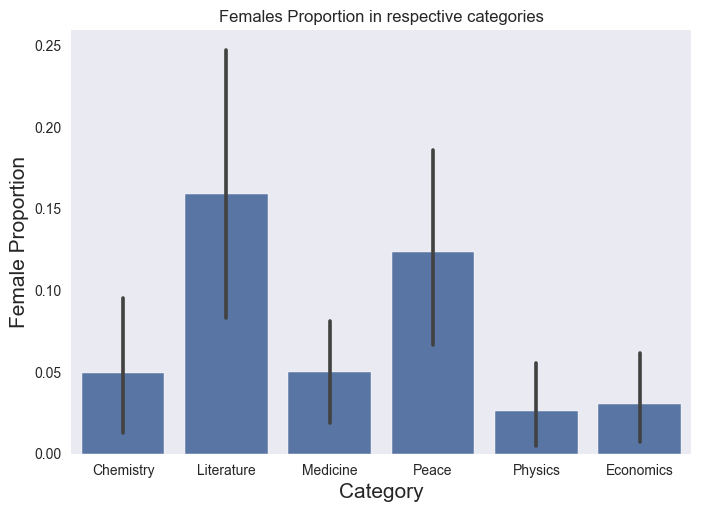

In [86]:
#Literature has the most Females
plt.title("Females Proportion in respective categories")
sns.barplot(df1,x="category",y="is_female")
plt.xlabel('Category',fontsize=15)
plt.ylabel('Female Proportion',fontsize=15)
print("Literature has the most women")

2020 Decade has the most women


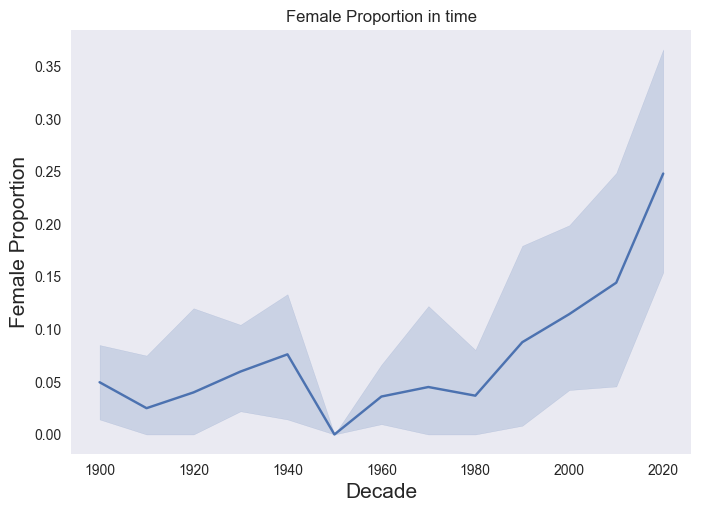

In [87]:
#2020 Decade has the most females
plt.title('Female Proportion in time')
sns.lineplot(df1,x='decade',y='is_female')
plt.xlabel('Decade',fontsize=15)
plt.ylabel('Female Proportion',fontsize=15)
print("2020 Decade has the most women")

Who was the first woman/man to receive a Nobel Prize, and in what category?

In [77]:
first_woman_category=df.query('is_female==True').sort_values("year").iloc[0,:].values[1]



In [78]:
first_woman_name=df.query('is_female==True').sort_values("year").loc[19,"full_name"]
print(f"The first woman to win a Nobel Prize was {first_woman_name} in {first_woman_category}")

The first woman to win a Nobel Prize was Marie Curie, née Sklodowska in Physics


In [79]:
first_man_name=df.query('is_female==False').sort_values('year').loc[0,"full_name"]

In [80]:
first_man_category=df.query('is_female==False').sort_values('year').loc[0,'category']
print(f"The first man to win a Nobel Prize was {first_man_name} in {first_man_category}")

The first man to win a Nobel Prize was Jacobus Henricus van 't Hoff in Chemistry


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [43]:
df["multiple"] = df["full_name"].map(df["full_name"].value_counts() >=2)

In [44]:
df3=df.query('multiple==True')
repeat_list=[]


In [85]:
toiterate=df3["full_name"].unique()
for i in toiterate:
    repeat_list.append(i)
print(f"These people/organizations have won more than one nobel prize: {repeat_list}")

These people/organizations have won more than one nobel prize: ['Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (U